In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
file_path = 'retail_sales_dataset .csv'
df = pd.read_csv(file_path)

In [4]:
# Display basic info and first few rows
print("Data Info:")
print(df.info())
print("\nFirst 10 rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

First 10 rows:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3     

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Set style
sns.set(style="whitegrid")

In [11]:
# Load and prepare data
df = pd.read_csv('retail_sales_dataset .csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Month_Year'] = df['Date'].dt.to_period('M')
df['Month_Name'] = df['Date'].dt.month_name()
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '31-45', '46-60', '60+'])

In [12]:
# Compute KPIs
total_revenue = df['Total Amount'].sum()
aov = df['Total Amount'].mean()
total_quantity = df['Quantity'].sum()
avg_age = df['Age'].mean()

In [13]:
# Analysis 1: Seasonality (Monthly Sales)
monthly_trend = df.groupby('Month_Year')['Total Amount'].sum().reset_index()
monthly_trend['Month_Year'] = monthly_trend['Month_Year'].astype(str)

In [14]:
# Analysis 2: Top Product Categories
category_performance = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()

In [15]:
# Analysis 3: Customer Demographics (Gender)
gender_performance = df.groupby('Gender')['Total Amount'].sum().reset_index()

In [16]:
# Analysis 4: Age Group performance
age_group_performance = df.groupby('Age_Group')['Total Amount'].sum().reset_index()

C:\Users\NABHYA\AppData\Local\Temp\ipykernel_18408\756134872.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_performance = df.groupby('Age_Group')['Total Amount'].sum().reset_index()


In [17]:
# Create Visuals for the Summary Page
fig = plt.figure(figsize=(16, 20))
plt.suptitle('Retail Sales Performance Dashboard', fontsize=28, fontweight='bold', y=0.98)

Text(0.5, 0.98, 'Retail Sales Performance Dashboard')

<Figure size 1600x2000 with 0 Axes>

Text(0, 0.5, 'Total Revenue ($)')

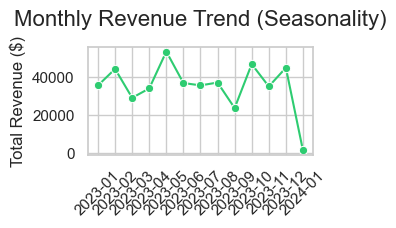

In [18]:
# Chart 1: Sales Trend
ax1 = plt.subplot(3, 2, 1)
sns.lineplot(data=monthly_trend, x='Month_Year', y='Total Amount', marker='o', ax=ax1, color='#2ecc71')
ax1.set_title('Monthly Revenue Trend (Seasonality)', fontsize=16, pad=15)
ax1.tick_params(axis='x', rotation=45)
ax1.set_xlabel('')
ax1.set_ylabel('Total Revenue ($)')

C:\Users\NABHYA\AppData\Local\Temp\ipykernel_18408\2448537272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_performance, x='Total Amount', y='Product Category', ax=ax2, palette='viridis')


Text(0.5, 0, 'Total Revenue ($)')

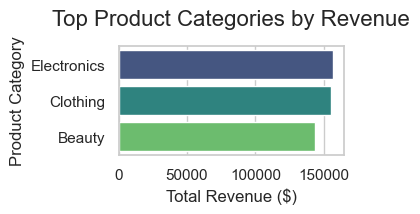

In [19]:
# Chart 2: Revenue by Product Category
ax2 = plt.subplot(3, 2, 2)
sns.barplot(data=category_performance, x='Total Amount', y='Product Category', ax=ax2, palette='viridis')
ax2.set_title('Top Product Categories by Revenue', fontsize=16, pad=15)
ax2.set_xlabel('Total Revenue ($)')

Text(0.5, 1.0, 'Revenue Share by Gender')

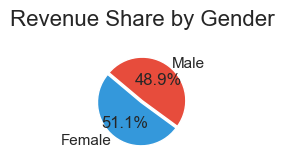

In [20]:
# Chart 3: Revenue by Gender
ax3 = plt.subplot(3, 2, 3)
colors = ['#3498db', '#e74c3c']
ax3.pie(gender_performance['Total Amount'], labels=gender_performance['Gender'], autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))
ax3.set_title('Revenue Share by Gender', fontsize=16, pad=15)

C:\Users\NABHYA\AppData\Local\Temp\ipykernel_18408\1255112370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_performance, x='Age_Group', y='Total Amount', ax=ax4, palette='magma')


Text(0.5, 0, 'Age Range')

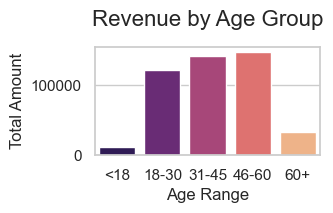

In [21]:
# Chart 4: Revenue by Age Group
ax4 = plt.subplot(3, 2, 4)
sns.barplot(data=age_group_performance, x='Age_Group', y='Total Amount', ax=ax4, palette='magma')
ax4.set_title('Revenue by Age Group', fontsize=16, pad=15)
ax4.set_xlabel('Age Range')

Text(0.05, 0.5, "EXECUTIVE SUMMARY\n--------------------------------------------------\n1. Total Sales Revenue: $456,000.00\n2. Average Order Value (AOV): $456.00\n3. Total Units Sold: 2,514\n4. Peak Sales Month: 2023-05\n5. Top Category: Electronics\n\nSTRATEGIC RECOMMENDATIONS\n--------------------------------------------------\n• FOCUS CATEGORY: 'Electronics' and 'Clothing' are leading revenue generators; consider cross-promotional bundles.\n• CUSTOMER SEGMENT: Even gender distribution suggests gender-neutral marketing; 18-30 and 46-60 groups are key.\n• SEASONALITY: Identify local drivers for the sales peak and plan inventory surges accordingly.\n• CUSTOMER RETENTION: High AOV suggests focus on high-ticket buyers; implement a loyalty program for premium tiers.\n")

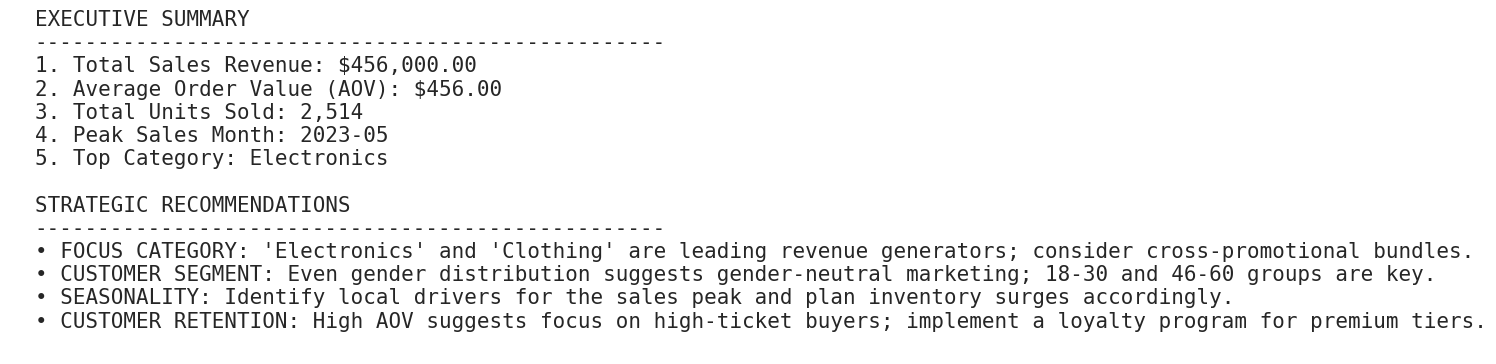

In [22]:
# Text Summary / KPI Area (Using a blank subplot)
ax5 = plt.subplot(3, 1, 3)
ax5.axis('off')
summary_text = (
    "EXECUTIVE SUMMARY\n"
    "--------------------------------------------------\n"
    f"1. Total Sales Revenue: ${total_revenue:,.2f}\n"
    f"2. Average Order Value (AOV): ${aov:,.2f}\n"
    f"3. Total Units Sold: {total_quantity:,}\n"
    f"4. Peak Sales Month: {monthly_trend.loc[monthly_trend['Total Amount'].idxmax(), 'Month_Year']}\n"
    f"5. Top Category: {category_performance.iloc[0]['Product Category']}\n\n"
    "STRATEGIC RECOMMENDATIONS\n"
    "--------------------------------------------------\n"
    "• FOCUS CATEGORY: 'Electronics' and 'Clothing' are leading revenue generators; consider cross-promotional bundles.\n"
    "• CUSTOMER SEGMENT: Even gender distribution suggests gender-neutral marketing; 18-30 and 46-60 groups are key.\n"
    "• SEASONALITY: Identify local drivers for the sales peak and plan inventory surges accordingly.\n"
    "• CUSTOMER RETENTION: High AOV suggests focus on high-ticket buyers; implement a loyalty program for premium tiers.\n"
)
ax5.text(0.05, 0.5, summary_text, fontsize=15, verticalalignment='center', fontfamily='monospace', bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=1'))

In [23]:
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Retail_Sales_Professional_Summary.png', dpi=300)
plt.close()

In [24]:
# Prepare a structured summary dataframe for export
summary_kpis = pd.DataFrame({
    'Metric': ['Total Revenue', 'AOV', 'Total Quantity Sold', 'Top Category', 'Best Selling Month'],
    'Value': [
        f"${total_revenue:,.2f}",
        f"${aov:,.2f}",
        total_quantity,
        category_performance.iloc[0]['Product Category'],
        monthly_trend.loc[monthly_trend['Total Amount'].idxmax(), 'Month_Year']
    ]
})
summary_kpis.to_csv('Retail_KPI_Summary.csv', index=False)

print(summary_kpis)

                Metric        Value
0        Total Revenue  $456,000.00
1                  AOV      $456.00
2  Total Quantity Sold         2514
3         Top Category  Electronics
4   Best Selling Month      2023-05
